In [1]:
%matplotlib inline

In [2]:
from NLStats import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
def gen_data(t, a, b, c, noise=0, n_outliers=0, random_state=0):
    """Function to generate sample data with noise and outlier points"""
    
    y = a + b * np.exp(t * c)

    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error

In [4]:
# Set parameters and generate data
a = 0.5
b = 2.0
c = -0.8
x_min = 0
x_max = 10
n_points = 15

x_data = np.linspace(x_min, x_max, n_points)
y_data = gen_data(x_data, a, b, c, noise=0.1, n_outliers=2)

In [5]:
# Set initial parameter estimates
param0 = Param(('a',1.), ('bb',1.5), ('cats012',0.))

In [6]:
def residualsfunc(p, x, y):
    """Residual function to minimise"""
    return p[0] + p[1] * np.exp(x * p[2]) - y

In [7]:
# Make new NLS class object
model1 = NLS(residualsfunc, param0, x_data, y_data, bounds=None, method='trf', loss='cauchy')

In [8]:
# Run fitting routine
model1.fit()

In [9]:
# Print output of fit
model1.tout()


Non-linear least squares regression
Model: 'residualsfunc'
Trust Region Reflective Algorithm
Info: `ftol` termination condition is satisfied.
Parameters:
  Factor       Estimate       Std Error      t-value    P(>|t|)
  a            4.446415e-01   3.211412e-01   1.38457   0.19139
  bb           2.225645e+00   5.540273e-01   4.01721   0.00171
  cats012     -4.559538e-01   3.055198e-01  -1.49239   0.16141

Residual Standard Error:  0.57385
                    AIC: 30.55950
                    BIC: 33.39170

Analysis of Variance:
  Source     DF   SS        MS         F-value   P(>F)
  Model       2   6.90229   3.45115   10.48005   0.00233
  Error      12   3.95168   0.32931
  Total      14  10.85397



In [11]:
# Setup plot data
x_test = np.linspace(x_min, x_max, n_points * 10)
y_true = gen_data(x_test, a, b, c)
y_lsq = gen_data(x_test, *model1.parmEsts.values())

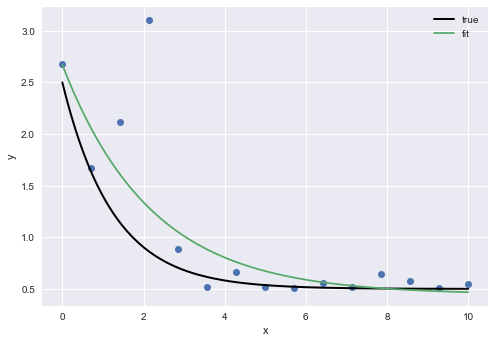

In [12]:
# Plot
plt.plot(x_data, y_data, 'o')
plt.plot(x_test, y_true, 'k', linewidth=2, label='true')
plt.plot(x_test, y_lsq, label='fit')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()